# Lotka-Vorterra equation

## Predator-Prey model
    - x = Phytoplankton
    - y = Zooplankton
    - dx/dt = ax - bxy
    - dy/dt = bxy - cy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
# coefficients
h = .1 # timestep size
t = np.arange(0,50,h) # time 
N = np.size(t) # dimension of time step
xo = .5 # initial condition in x
yo = .5 # initial condition in y
# set parameters
a = 1
b = 1
c = 1

In [3]:
def tendency(t,xin,a,b,c):
    # expand into x and y
    x=xin[0]
    y=xin[1]
    # tendency
    dxdt=a*x - b*x*y
    dydt=b*x*y - c*y
    out = np.array([dxdt,dydt])
    return out

### Euler forward

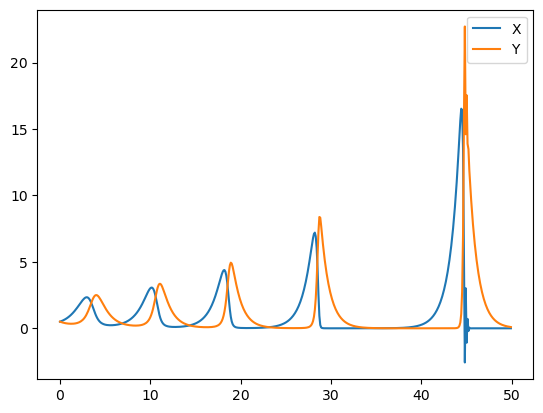

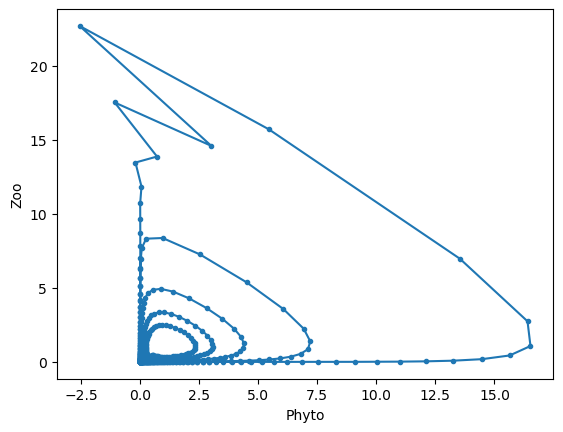

In [4]:
# Euler forward
x_e=np.empty(N)
y_e=np.empty(N)
x_e[0]=.5
y_e[0]=.5
for n in range(N-1):
    dx = tendency(t[n],[x_e[n],y_e[n]],a,b,c)
    x_e[n+1] = x_e[n] + h*dx[0]
    y_e[n+1] = y_e[n] + h*dx[1]
plt.plot(t,x_e,label='X')
plt.plot(t,y_e,label='Y')
plt.legend()
plt.show()
#
plt.plot(x_e,y_e,'.-')
plt.xlabel('Phyto')
plt.ylabel('Zoo')
plt.show()

### RK-2

In [5]:
def timestep(x,y,dxdt,dydt,h):
    xp = x + h*dxdt
    yp = y + h*dydt
    return xp,yp

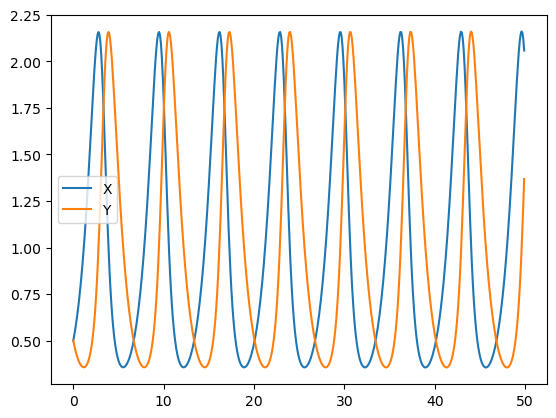

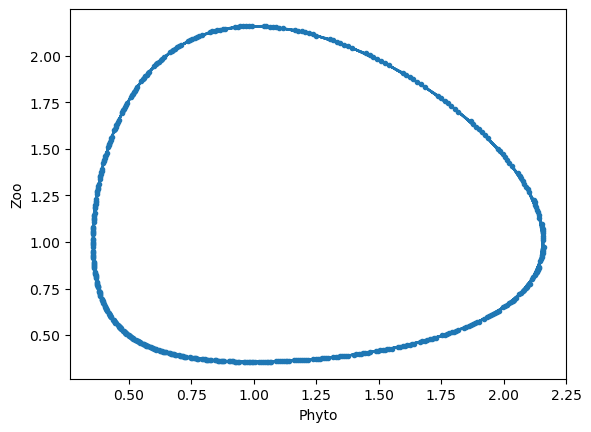

In [6]:
# 2nd order Runge-Kutta
x_p=np.empty(N)
y_p=np.empty(N)
x_p[0]=xo
y_p[0]=yo
#
for n in range(N-1):
    dx1 = tendency(t[n],[x_p[n],y_p[n]],a,b,c)
    x1,y1=timestep(x_p[n],y_p[n],dx1[0],dx1[1],h)
    dx2= tendency(t[n],[x1,y1],a,b,c)
    dx = .5*np.array(dx1+dx2)
    x_p[n+1],y_p[n+1] = timestep(x_p[n],y_p[n],dx[0],dx[1],h)
plt.plot(t,x_p,label='X')
plt.plot(t,y_p,label='Y')
plt.legend()
plt.show()
#
plt.plot(x_p,y_p,'.-')
plt.xlabel('Phyto')
plt.ylabel('Zoo')
plt.show()

### RK-4

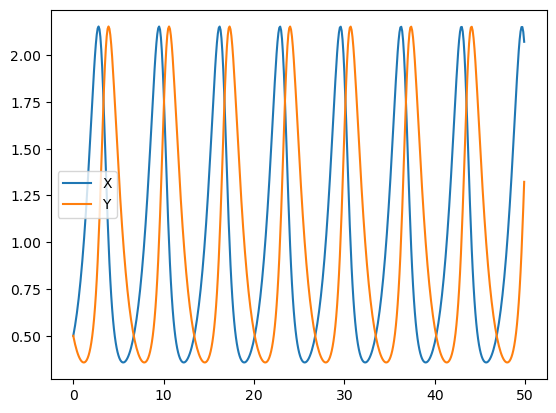

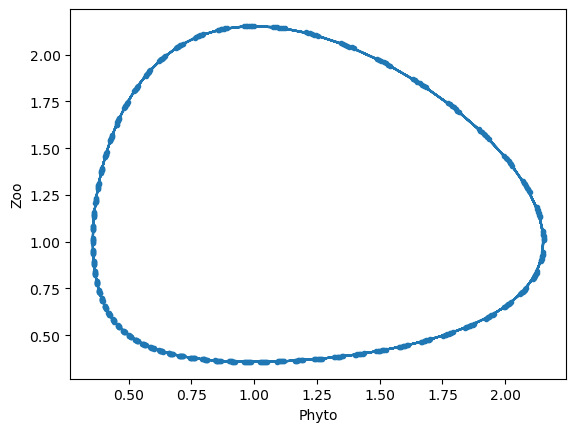

In [7]:
# 4th order Runge-Kutta
x_p=np.empty(N)
y_p=np.empty(N)
x_p[0]=xo
y_p[0]=yo
#
for n in range(N-1):
    dx1 = tendency(t[n],[x_p[n],y_p[n]],a,b,c)
    x1,y1=timestep(x_p[n],y_p[n],dx1[0],dx1[1],h/2)
    dx2= tendency(t[n]+h/2,np.array([x1,y1]),a,b,c)
    x2,y2=timestep(x_p[n],y_p[n],dx2[0],dx2[1],h/2)
    dx3= tendency(t[n]+h/2,np.array([x2,y2]),a,b,c)
    x3,y3=timestep(x_p[n],y_p[n],dx3[0],dx3[1],h)
    dx4= tendency(t[n]+h,np.array([x3,y3]),a,b,c)  
    dx = 1/6*np.array(dx1+2*dx2+2*dx3+dx4)
    x_p[n+1],y_p[n+1] = timestep(x_p[n],y_p[n],dx[0],dx[1],h)  
plt.plot(t,x_p,label='X')
plt.plot(t,y_p,label='Y')
plt.legend()
plt.show()
#
plt.plot(x_p,y_p,'.-')
plt.xlabel('Phyto')
plt.ylabel('Zoo')
plt.show()

### Using odeint

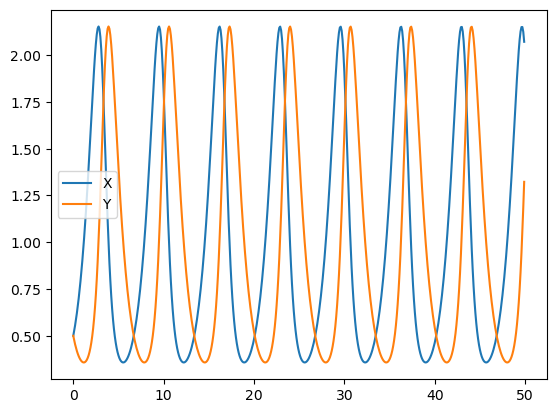

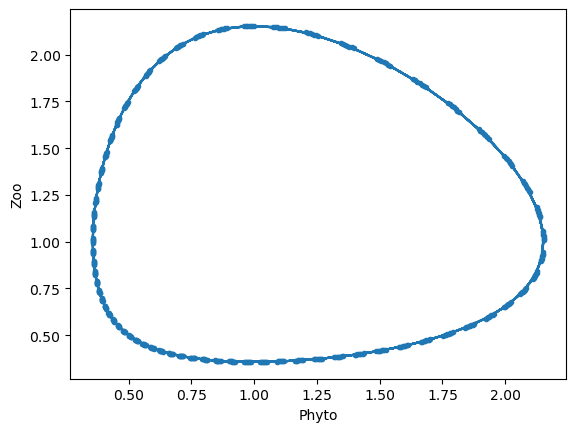

In [8]:
# odeint
init=np.array([xo,yo])
sol = odeint(tendency,init,t,args=(a,b,c),tfirst=True)
#
x_p=sol[:,0]
y_p=sol[:,1]
#
plt.plot(t,x_p,label='X')
plt.plot(t,y_p,label='Y')
plt.legend()
plt.show()
#
plt.plot(x_p,y_p,'.-')
plt.xlabel('Phyto')
plt.ylabel('Zoo')
plt.show()

### A function call to perform integration

In [9]:
# define model_run function
def model_run(trange,xinit,param,dt):
    # expand input
    a = param[0]
    b = param[1]
    c = param[2]
    sol = solve_ivp(tendency,trange,xinit,args=(a,b,c),method='RK45',max_step=dt)
    return sol

In [10]:
# set time range
trange = [0,50]
# set parameters
param=np.array([1,1,1])
# set initial conditions
xinit = np.array([.65,.2])
# max time step
h=.1
out = model_run(trange,xinit,param,h)

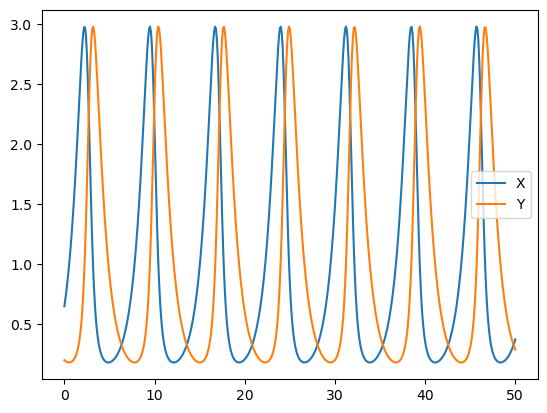

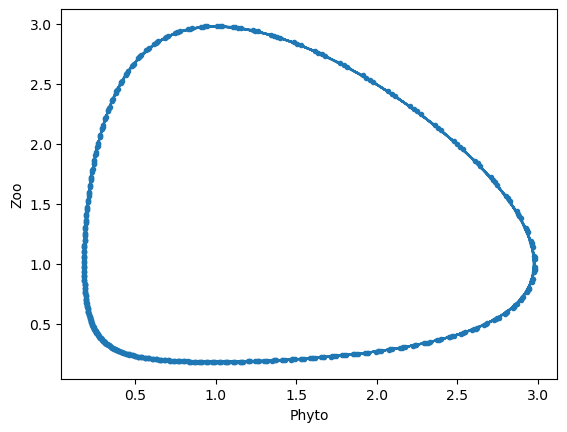

In [11]:
# plot the output
t_out = out.t
vec_out = out.y
x_out = vec_out[0,:]
y_out = vec_out[1,:]
#
#
plt.plot(t_out,x_out,label='X')
plt.plot(t_out,y_out,label='Y')
plt.legend()
plt.show()
#
plt.plot(x_out,y_out,'.-')
plt.xlabel('Phyto')
plt.ylabel('Zoo')
plt.show()

In [31]:
c=np.array([[1,],[2,],[3,]])
np.shape(c)

(3, 1)

In [39]:
d={'a':[1,2,3],'b':[4,5]}

In [43]:
d['a']

[1, 2, 3]